<a href="https://colab.research.google.com/github/Anna-Battaglia/MLPNS_ABattaglia/blob/main/KS_earthquake_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats

In [72]:
eqs = pd.read_csv("https://github.com/fedhere/MLPNS_FBianco/blob/main/statistics/KStest/earthquakes.csv?raw=true", sep=" ")

In [73]:
eqs.shape

(70798, 34)

In [74]:
eqs.head() #return the first n rows, default n=5

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,...,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
eqs.describe() #Generate descriptive statistics (quando può farlo) descrizione statistica dei dati

,GT,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 15,Unnamed: 16,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
count,0.0,70798.000000,0.0,0.0,70798.000000,70798.00000,0.0,9648.000000,7.359000e+03,4.628900e+04,...,3387.000000,469.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,2.417826,NaN,NaN,33.977749,-116.88145,NaN,13.354343,6.097558e+06,4.482677e+06,...,43.415412,14.746269,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.407683,NaN,NaN,1.156586,1.07667,NaN,2.724517,4.441852e+06,3.130379e+06,...,24.266088,17.013243,2.828427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,30.094830,-121.76000,NaN,10.000000,1.000432e+06,1.070000e+02,...,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.120000,NaN,NaN,33.061000,-117.69200,NaN,11.200000,3.041641e+06,3.031237e+06,...,24.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.300000,NaN,NaN,34.056750,-116.59000,NaN,12.800000,3.229114e+06,3.110080e+06,...,38.000000,13.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.590000,NaN,NaN,34.591000,-116.25100,NaN,14.900000,9.669999e+06,9.027968e+06,...,61.000000,24.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,7.100000,NaN,NaN,37.985500,-113.71900,NaN,29.300000,3.736673e+07,9.875061e+06,...,145.000000,88.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
eqs.columns

Index(['#YYY/MM/DD', 'HH:mm:SS.ss', 'ET', 'GT', 'MAG', 'Unnamed: 5', 'M',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'LAT', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'LON', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'DEPTH', 'Q', 'Unnamed: 25', 'EVID',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'NPH', 'NGRM'],
      dtype='object')

In [77]:
eqs.rename({"#YYY/MM/DD": "date", 
            "HH:mm:SS.ss": "time"}, axis=1, inplace=True) #se no mi dà un nuovo df

In [78]:
eqs

,date,time,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.24600,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.94500,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.34300,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.66800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.96300,...,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70793,2002/12/29,19:37:24.56,eq,NaN,l,2.21,l,NaN,NaN,35.31400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70794,2002/12/29,20:17:33.40,eq,NaN,l,2.02,l,NaN,NaN,35.32133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70795,2002/12/29,20:21:28.73,eq,NaN,l,2.07,l,NaN,NaN,35.32150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70796,2002/12/30,21:51:52.55,eq,NaN,l,2.31,l,NaN,NaN,35.31867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
eqs.head()

,date,time,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,...,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#dtype

'b'       boolean \\
'i'       (signed) integer \\
'u'       unsigned integer \\
'f'       floating-point \\
'c'       complex-floating point \\
'O'       (Python) objects \\
'S', 'a'  (byte-)string \\
'U'       Unicode \\
'V'       raw data (void) \\

In [80]:
eqs.time.dtype, eqs.date.dtype

(dtype('O'), dtype('O'))

In [81]:
pd.to_datetime("1984/01/01" + " " + "19:38:19.79") # 1984/01/01 prima data, 19:38:19.79 quinto orario
#trasformo di dati in datetime format

Timestamp('1984-01-01 19:38:19.790000')

In [82]:
eqs.date.map(pd.to_datetime)

0       1984-01-01
1       1984-01-01
2       1984-01-01
3       1984-01-01
4       1984-01-01
           ...    
70793   2002-12-29
70794   2002-12-29
70795   2002-12-29
70796   2002-12-30
70797   2002-12-30
Name: date, Length: 70798, dtype: datetime64[ns]

In [83]:
for i in range(len(eqs)):
  if eqs.iloc[i]["time"].endswith("60.00"):
    print(eqs.iloc[i]["time"])
    print(eqs.iloc[i]["time"].replace("60.00", "59.99"))
    eqs.at[i, "time"] = eqs.iloc[i]["time"].replace("60.00", "59.99")
    print(eqs.iloc[i]["time"])

04:48:60.00
04:48:59.99
04:48:59.99
14:19:60.00
14:19:59.99
14:19:59.99
21:48:60.00
21:48:59.99
21:48:59.99
15:34:60.00
15:34:59.99
15:34:59.99
06:41:60.00
06:41:59.99
06:41:59.99


In [84]:
eqs['datetime'] = [eqs.iloc[i].date + " " + eqs.iloc[i].time for i in range(len(eqs))]
eqs["datetime"] = eqs["datetime"].map(pd.to_datetime) #ora che ho cambiato 60.00 in 59.99 posso usare pd.to_datetime

In [85]:
#delete
# first I create the timetamps pairs for the beginning and end of the valid periods. 
# I do it with a for loop that appends pairs of timestamps to a list that I create at the beginning

# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5), 
          (1990.3, 1992.1), 
          (1994.6, 1995.6),
          (1996.1,1996.5), 
          (1997,1997.6), 
          (1997.75,1998.15), 
          (1998.25,1999.35), 
          (2000.55,2000.8),
          (2000.9 ,2001.25), 
          (2001.6 ,2002), 
          (2002.5 ,2003)]:
    
    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime. 
    ss.append((pd.to_datetime(int(t[0]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))

In [86]:
ss

[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-03 00:00:00')),
 (Timestamp('1990-04-21 00:00:00'), Timestamp('1992-02-07 00:00:00')),
 (Timestamp('1994-08-08 00:00:00'), Timestamp('1995-08-08 00:00:00')),
 (Timestamp('1996-02-07 00:00:00'), Timestamp('1996-07-02 00:00:00')),
 (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 00:00:00')),
 (Timestamp('1997-10-02 00:00:00'), Timestamp('1998-02-25 00:00:00')),
 (Timestamp('1998-04-02 00:00:00'), Timestamp('1999-05-09 00:00:00')),
 (Timestamp('2000-07-20 00:00:00'), Timestamp('2000-10-19 00:00:00')),
 (Timestamp('2000-11-25 00:00:00'), Timestamp('2001-04-02 00:00:00')),
 (Timestamp('2001-08-08 00:00:00'), Timestamp('2002-01-01 00:00:00')),
 (Timestamp('2002-07-03 00:00:00'), Timestamp('2003-01-01 00:00:00'))]

In [87]:
gooddates = (((eqs.datetime >= ss[0][0]) * (eqs.datetime <= ss[0][1])) +\
        ((eqs.datetime >=ss [1][0]) * (eqs.datetime <= ss[1][1])) +\
        ((eqs.datetime >=ss [2][0]) * (eqs.datetime <= ss[2][1])) +\
        ((eqs.datetime >=ss [3][0]) * (eqs.datetime <= ss[3][1])) +\
        ((eqs.datetime >=ss [4][0]) * (eqs.datetime <= ss[4][1])) +\
        ((eqs.datetime >=ss [5][0]) * (eqs.datetime <= ss[5][1])) +\
        ((eqs.datetime >=ss [6][0]) * (eqs.datetime <= ss[6][1])) +\
        ((eqs.datetime >=ss [7][0]) * (eqs.datetime <= ss[7][1])) +\
        ((eqs.datetime >=ss [8][0]) * (eqs.datetime <= ss[8][1])) +\
        ((eqs.datetime >=ss [9][0]) * (eqs.datetime <= ss[9][1])) +\
        # s between start and end of last time period
        ((eqs.datetime >=ss [10][0]) * (eqs.datetime <= ss[10][1])\
        ).values)

In [88]:
ss

[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-03 00:00:00')),
 (Timestamp('1990-04-21 00:00:00'), Timestamp('1992-02-07 00:00:00')),
 (Timestamp('1994-08-08 00:00:00'), Timestamp('1995-08-08 00:00:00')),
 (Timestamp('1996-02-07 00:00:00'), Timestamp('1996-07-02 00:00:00')),
 (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 00:00:00')),
 (Timestamp('1997-10-02 00:00:00'), Timestamp('1998-02-25 00:00:00')),
 (Timestamp('1998-04-02 00:00:00'), Timestamp('1999-05-09 00:00:00')),
 (Timestamp('2000-07-20 00:00:00'), Timestamp('2000-10-19 00:00:00')),
 (Timestamp('2000-11-25 00:00:00'), Timestamp('2001-04-02 00:00:00')),
 (Timestamp('2001-08-08 00:00:00'), Timestamp('2002-01-01 00:00:00')),
 (Timestamp('2002-07-03 00:00:00'), Timestamp('2003-01-01 00:00:00'))]

In [89]:
eqs.rename({'Unnamed: 5':'mag'},axis=1, inplace=True)

In [90]:
eqGoodData = eqs[gooddates][['datetime', 'mag']]

In [91]:
eqGoodData

,datetime,mag
0,1984-01-01 01:30:57.520,2.02
1,1984-01-01 05:31:34.160,2.12
2,1984-01-01 06:59:05.140,2.43
3,1984-01-01 11:10:25.290,2.07
4,1984-01-01 19:38:19.790,2.13
...,...,...
70793,2002-12-29 19:37:24.560,2.21
70794,2002-12-29 20:17:33.400,2.02
70795,2002-12-29 20:21:28.730,2.07
70796,2002-12-30 21:51:52.550,2.31


In [92]:
eqGoodData[eqGoodData['mag'] >=2]

,datetime,mag
0,1984-01-01 01:30:57.520,2.02
1,1984-01-01 05:31:34.160,2.12
2,1984-01-01 06:59:05.140,2.43
3,1984-01-01 11:10:25.290,2.07
4,1984-01-01 19:38:19.790,2.13
...,...,...
70793,2002-12-29 19:37:24.560,2.21
70794,2002-12-29 20:17:33.400,2.02
70795,2002-12-29 20:21:28.730,2.07
70796,2002-12-30 21:51:52.550,2.31


In [93]:
eqGoodData.rename({'Unnamed: 5':'mag'}, axis=1, inplace=True)

In [94]:
eqGoodData['gaps'] = eqGoodData['datetime'].diff().values.astype(float)

<Axes: ylabel='Frequency'>

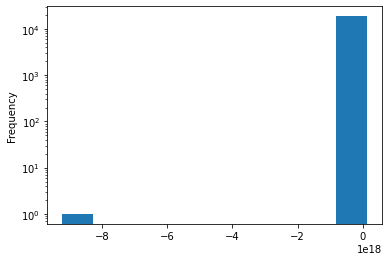

In [95]:
eqGoodData.gaps.plot(kind='hist', logy=True)

<Axes: ylabel='Frequency'>

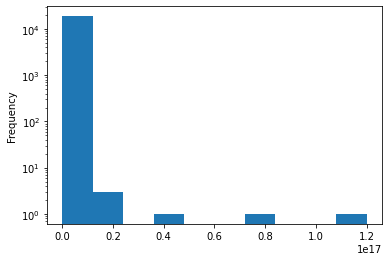

In [96]:
eqGoodData=eqGoodData[1:]
eqGoodData.gaps.plot(kind='hist', logy=True)

In [97]:
monthgap = 2.628e+15 # month in ns

In [98]:
eqGoodData = eqGoodData[eqGoodData.gaps < monthgap]

<Axes: ylabel='Frequency'>

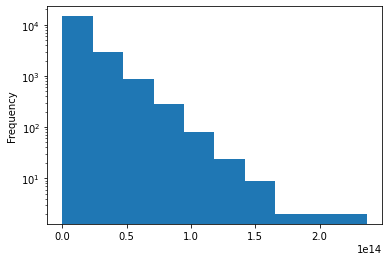

In [99]:
eqGoodData.gaps.plot(kind='hist', logy=True)

In [100]:
alpha = 0.003